In [30]:
import torch
import torchvision
import torch.nn.functional as F
from torch.autograd import variable
import matplotlib.pyplot as plt


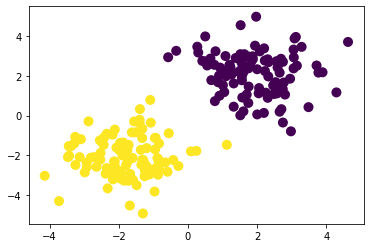

In [31]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)          #y0标签
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)             #x1标签

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  #合并作为数据
y = torch.cat((y0, y1), ).type(torch.LongTensor)    #合并作为标签，标枪都为LongTensor

plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=100, lw=0)
plt.show()

In [32]:
# device=torch.device("cpu")
# print(device)
# x=x.to(device)
# y=y.to(device)

In [33]:
# method 1
class Net(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = self.hidden2(x)
        return x
    

In [42]:
# method 2  快速创建
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2),
)

net = Net(2, 10, 2)   #分类问题 输入维度 输出维度
print(net)
print(net2)


Net(
  (hidden1): Linear(in_features=2, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


Net(
  (hidden1): Linear(in_features=2, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=2, bias=True)
)


C:\Users\mzd\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


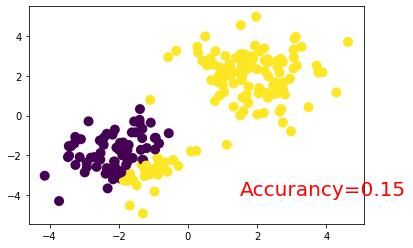

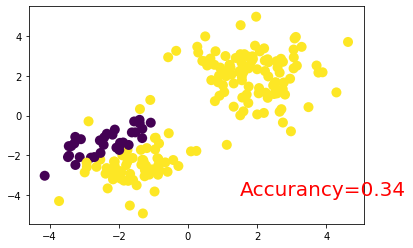

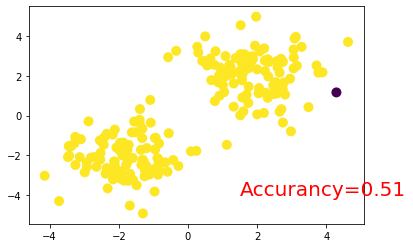

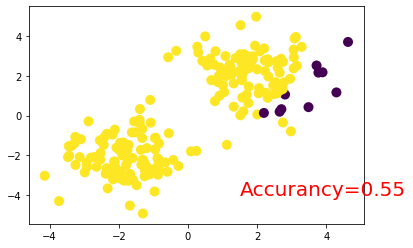

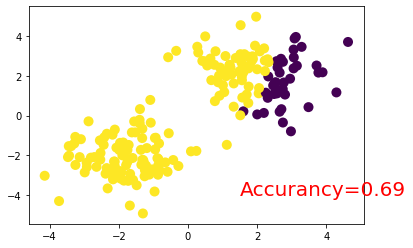

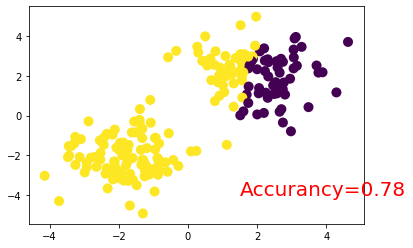

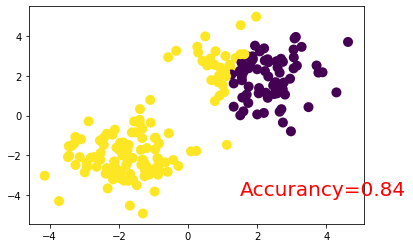

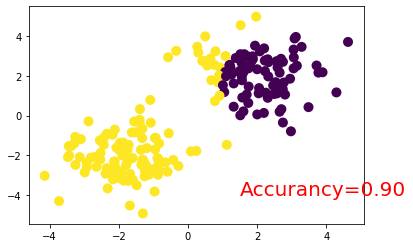

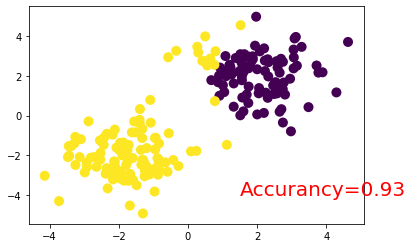

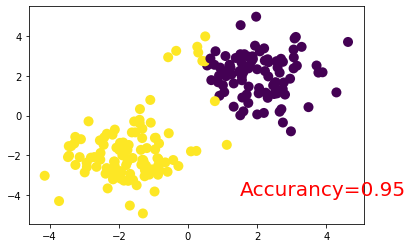

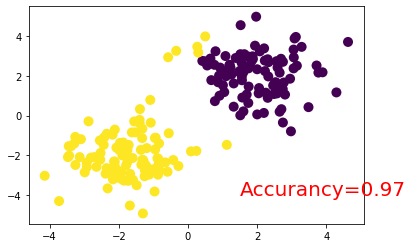

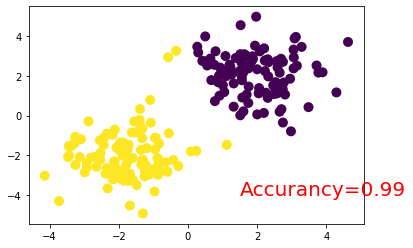

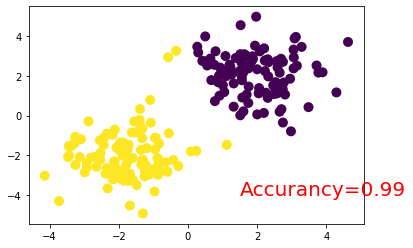

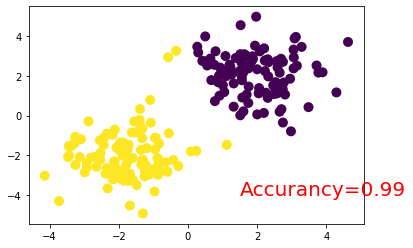

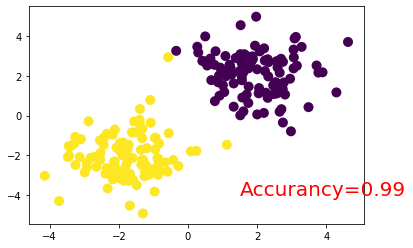

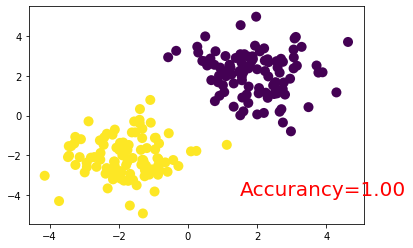

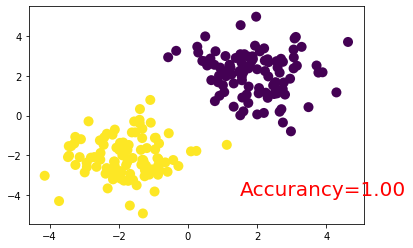

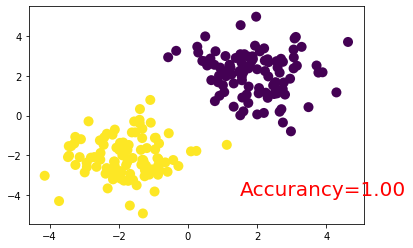

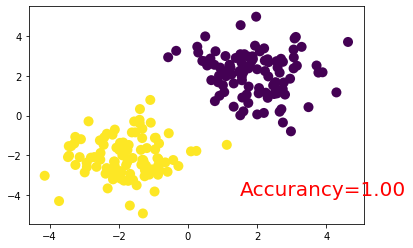

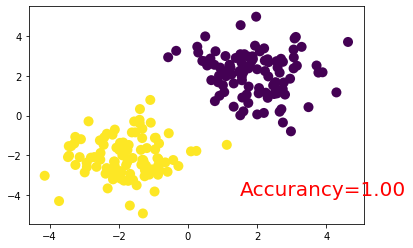

In [41]:
net = Net(2, 10, 2)   #分类问题 输入维度 输出维度
print(net)

# plt.ion()   #设置为实时打印
# plt.show()

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
# loss_func = torch.nn.MSELoss()  #均方差回归问题
loss_func = torch.nn.CrossEntropyLoss()  #多分类问题，相当于softmax

for i in range(100):
    out = net(x)
    
    loss = loss_func(out, y)
    
    optimizer.zero_grad()   #优化   反向传播
    loss.backward()
    optimizer.step()
    
    #作图
    if i % 5 == 0:
        prediction = torch.max(F.softmax(out), 1)[1]  # [1] 返回索引  [0]返回最大值
        pred_y = prediction.numpy().squeeze()
        target_y = y.numpy()
        plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=100, lw=0)
        accuracy = sum(pred_y == target_y) /200
        plt.text(1.5, -4, 'Accurancy=%.2f' % accuracy, fontdict={'size':20, 'color':'red'})
        plt.show()
        
        
#scatter点云图
#plot直线图  

